## À propos

- **Auteur** : Mohammed Ali EL ADLOUNI  et Angelo Lamure-Fontanin
- **Master** : Master M2 MALIA
- **Date** : 09/02/2025  


## LRP appliqué à un réseau de neurones entièrement connecté (FC)**

Dans cette tâche, l'objectif est de calculer la pertinence de certains éléments d'un petit réseau de neurones entièrement connecté.  

Le réseau se compose de :  
- Une **couche d’entrée** (ses neurones sont indexés par \(i\)),  
- Une **couche cachée** (\(j\)),  
- Une **couche de sortie** (\(k\)).  

Les notations utilisées sont :  
- \(x_i\) : valeurs des neurones d'entrée,  
- \(x_j\) : sorties des neurones de la couche cachée,  
- \(x_k\) : sorties des neurones de la couche de sortie.  


L'algorithme **LRP** (Layer-wise Relevance Propagation) sera appliqué pour **calculer la pertinence de chaque neurone et de chaque entrée**.


In [18]:
################################################################################
# [0.] Installation of the necessary packages ==================================
################################################################################

!pip3 install scipy
!pip3 install matplotlib

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


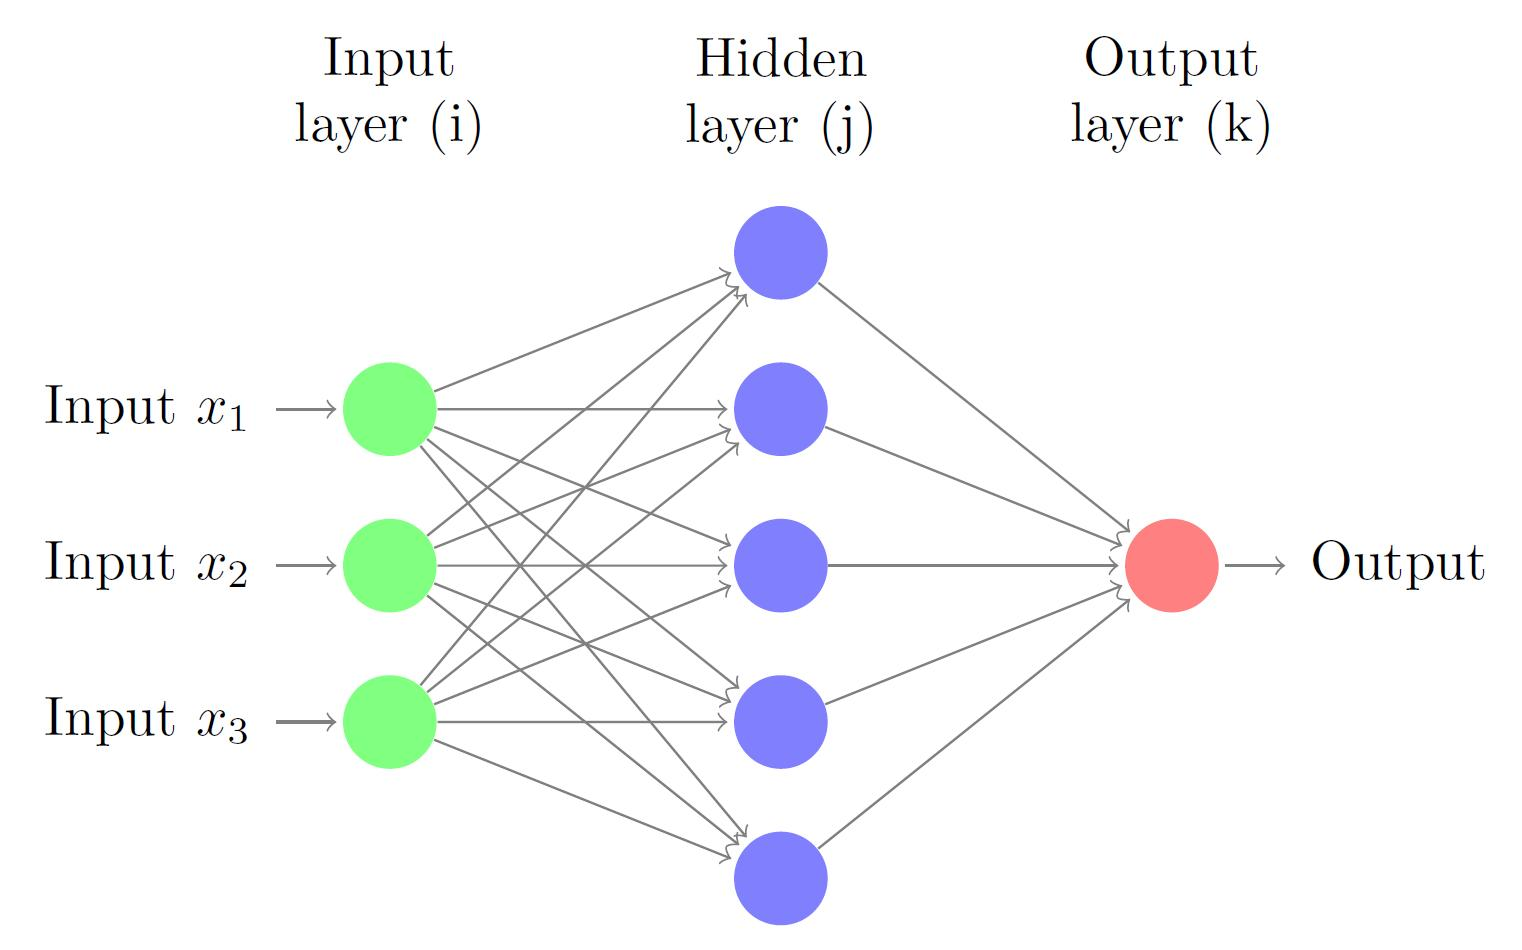

In [19]:
################################################################################
# Figure of the overall architecture of the FC network =========================
################################################################################

from google.colab import drive
drive.mount('/content/drive/')

from IPython.display import Image
Image("/content/word_importance_lig.png")


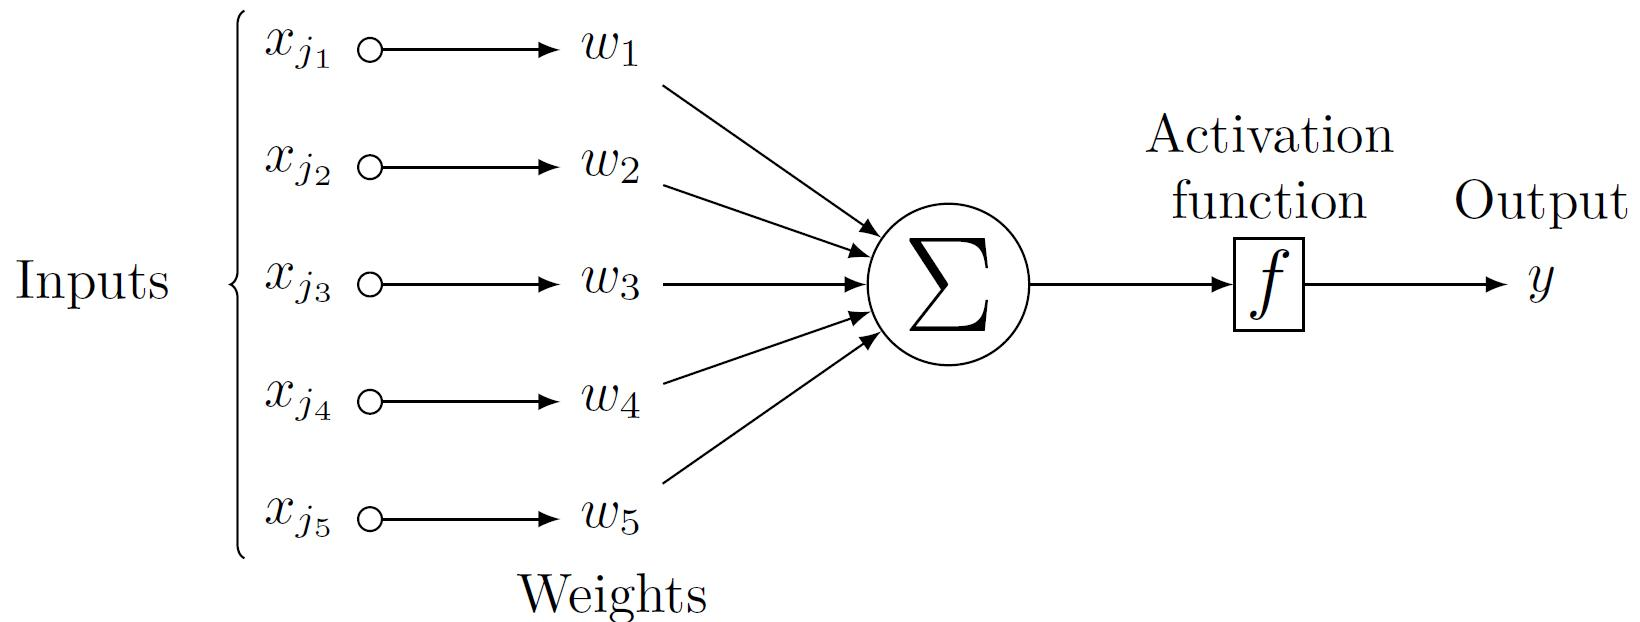

In [20]:
################################################################################
# Figure of the functionality of one neuron - the one of the output layer, =====
# but can be extended to all neurons without loss of generality ================
################################################################################

from IPython.display import Image
Image("/content/FC_Neural_Network_B.jpg")

In [21]:
################################################################################
# Mathematical euqations for the computation of relevances (R) =================
# in the output (k), hidden (j) and input (i) layer. ===========================
################################################################################
from IPython.display import Math, HTML

# The output layer's (k) output is the sum of the all inputs x_j ---------------
# The relevance R_k of the neuron in this layer --------------------------------
# is also the sum of all its inputs --------------------------------------------

# The output x_j of each neuron in layer (j) -----------------------------------
# (each of them is subscripted with j) -----------------------------------------
# is either zero or equals to the sum of the weighted inputs -------------------
# plus the bias term -----------------------------------------------------------

Math(r'x_j = max(0, \sum_i x_i w_{ij} + b_j) \\ R_k = x_k = \sum_j x_j \\ ')

<IPython.core.display.Math object>

In [22]:
# The relevance of each neuron j in layer (j) is R_j. --------------------------
# This can be deduced from the equation that computes x_j ----------------------
# and by the observation that the root point (x_tilde) equals to zero. ---------

from IPython.display import Math

Math(r'R_j = R_k(\tilde{\mathbf{x}}) + \frac{\partial R_k}{\partial x_j} \biggr\rvert_{\{ \tilde{x}_j \}} \cdot (x_j - \tilde{x}_j) = x_j = max(0, \sum_i x_i w_{ij} + b_j) \\' )




<IPython.core.display.Math object>

In [23]:
# The relevance of each neuron i in layer (i), which is practically the input --
# is R_i. The mathematical equations behind this computation -------------------
# can be found in the referenced sources and are out of scope of this ----------
# task. What is important to emphasize is that the relevance is proportional ---
# to the power of the weights - remember that the weights can be ---------------
# positive and negative --------------------------------------------------------

from IPython.display import Math

Math(r'R_i = \sum_j \frac{w_{ij}^2}{\sum_{\'{i}}} w_{\acute{\'{i}}j}^2} R_j')

<IPython.core.display.Math object>

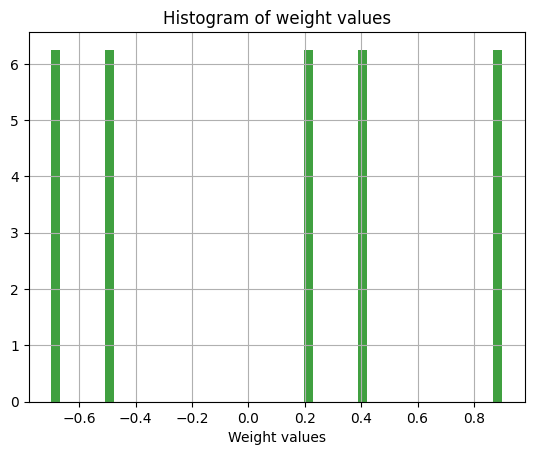

In [42]:
import numpy as np
import matplotlib.pyplot as plt

################################################################################
# [1.] Define input, weights ===================================================
#      and see their distribution with a histogram =============================
################################################################################

# i: input layer, j: hidden layer, k: output layer

# 1.1. Values selected by user -------------------------------------------------
x_i_dict = {'x_1': 3, 'x_2': 4, 'x_3': -10}

w_j_1_dict = {'w_i1_j1': -0.2, 'w_i2_j1': 0.5, 'w_i3_j1': -0.1}
w_j_2_dict = {'w_i1_j2': -0.25, 'w_i2_j2': 0.1, 'w_i3_j2': 0.4}
w_j_3_dict = {'w_i1_j3': 0.2, 'w_i2_j3': -0.3, 'w_i3_j3': -0.2}
w_j_4_dict = {'w_i1_j4': 0.5, 'w_i2_j4': -0.8, 'w_i3_j4': 0.6}
w_j_5_dict = {'w_i1_j5': 0.1, 'w_i2_j5': 0.4, 'w_i3_j5': 0.7}

w_k_dict = {'w_j1_k1': 0.8, 'w_j2_k1': 0.1, 'w_j3_k1': -0.2,
            'w_j4_k1': -0.4, 'w_j5_k1': 0.6}

################################################################################

x_i_dict = {'x_1': 2, 'x_2': 1, 'x_3': -7}

w_j_1_dict = {'w_i1_j1': -0.5, 'w_i2_j1': 0.3, 'w_i3_j1': -0.15}
w_j_2_dict = {'w_i1_j2': -0.25, 'w_i2_j2': 0.1, 'w_i3_j2': 0.47}
w_j_3_dict = {'w_i1_j3': 0.2, 'w_i2_j3': 0.3, 'w_i3_j3': +0.4}
w_j_4_dict = {'w_i1_j4': 0.1, 'w_i2_j4': 0.8, 'w_i3_j4': -0.6}
w_j_5_dict = {'w_i1_j5': 0.1, 'w_i2_j5': 0.9, 'w_i3_j5': -0.7}

w_k_dict = {'w_j1_k1': 0.2, 'w_j2_k1': 0.9, 'w_j3_k1': -0.7,
            'w_j4_k1': 0.4, 'w_j5_k1': -0.5}


# 1.2. Randomly (Normally distributed) values ----------------------------------
mu, sigma = 0, 0.05
x_i_normal = np.random.normal(mu, sigma, 3)

x_j_1_normal = np.random.normal(mu, sigma, 3)
x_j_2_normal = np.random.normal(mu, sigma, 3)
x_j_3_normal = np.random.normal(mu, sigma, 3)
x_j_4_normal = np.random.normal(mu, sigma, 3)
x_j_5_normal = np.random.normal(mu, sigma, 3)

x_k_normal = np.random.normal(mu, sigma, 5)


# Histogram of weights ---------------------------------------------------------
n, bins, patches = plt.hist(w_k_dict.values(), 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Weight values')
plt.title('Histogram of weight values')
plt.grid(True)
plt.show()


The objective of the task is to encourage the user to select input values as well as weight values randomly or purposefully and see how the output of the neurons, as well as the relevances, change according to those changes. The variables "x_i_dict", "w_j_1_dict" ... "w_j_5_dict", "w_k_dict" correspond to the variables in the above defined mathematical equations. One can also generate weights that follow a distribution or are completely random. In this example, we set it to gaussian, but it can be easily replaced.

In [43]:
################################################################################
# [2.] Compute equations of feedforward pass ===================================
# Apply those equations to compute the output of the network ===================
################################################################################
sum_j1 = x_i_dict['x_1'] * w_j_1_dict['w_i1_j1'] + \
         x_i_dict['x_2'] * w_j_1_dict['w_i2_j1'] + \
         x_i_dict['x_3'] * w_j_1_dict['w_i3_j1']

sum_j2 = x_i_dict['x_1'] * w_j_2_dict['w_i1_j2'] + \
         x_i_dict['x_2'] * w_j_2_dict['w_i2_j2'] + \
         x_i_dict['x_3'] * w_j_2_dict['w_i3_j2']

sum_j3 = x_i_dict['x_1'] * w_j_3_dict['w_i1_j3'] + \
         x_i_dict['x_2'] * w_j_3_dict['w_i2_j3'] + \
         x_i_dict['x_3'] * w_j_3_dict['w_i3_j3']

sum_j4 = x_i_dict['x_1'] * w_j_4_dict['w_i1_j4'] + \
         x_i_dict['x_2'] * w_j_4_dict['w_i2_j4'] + \
         x_i_dict['x_3'] * w_j_4_dict['w_i3_j4']

sum_j5 = x_i_dict['x_1'] * w_j_5_dict['w_i1_j5'] + \
         x_i_dict['x_2'] * w_j_5_dict['w_i2_j5'] + \
         x_i_dict['x_3'] * w_j_5_dict['w_i3_j5']

# Apply ReLU -------------------------------------------------------------------
val_j1 = max(0, sum_j1)
val_j2 = max(0, sum_j2)
val_j3 = max(0, sum_j3)
val_j4 = max(0, sum_j4)
val_j5 = max(0, sum_j5)

# Compute the output of the NN -------------------------------------------------
val_k1 = val_j1 + val_j2 + val_j3 + val_j4 + val_j5
print(f"Output value of the network: {val_k1}")


Output value of the network: 11.55


In [44]:
################################################################################
################################################################################
################################################################################
# [3.] Compute the relevances of each neuron in all layers =====================
# The relevances computations follow the mathematical formulas defined above. ==
################################################################################
################################################################################
################################################################################

################################################################################
# [3.1] Compute relevance of output layer (k) ==================================
################################################################################
R_k = val_k1

print(f"Relevances of neurons of k layer: {R_k}")

################################################################################
# [3.2] Compute relevance of every one of the 5 neurons of the layer (j) =======
################################################################################
R_j1 = val_j1
R_j2 = val_j2
R_j3 = val_j3
R_j4 = val_j4
R_j5 = val_j5

print(f"Relevances of neurons of j layer: {R_j1}, {R_j2}, {R_j3}, {R_j4}, {R_j5}")

################################################################################
# [3.3] Compute relevance of every one of the 3 neurons of the layer (i) =======
################################################################################
sum_j1_power = w_j_1_dict['w_i1_j1'] ** 2 + \
               w_j_1_dict['w_i2_j1'] ** 2 + \
               w_j_1_dict['w_i3_j1'] ** 2

sum_j2_power = w_j_2_dict['w_i1_j2'] ** 2 + \
               w_j_2_dict['w_i2_j2'] ** 2 + \
               w_j_2_dict['w_i3_j2'] ** 2

sum_j3_power = w_j_3_dict['w_i1_j3'] ** 2 + \
               w_j_3_dict['w_i2_j3'] ** 2 + \
               w_j_3_dict['w_i3_j3'] ** 2

sum_j4_power = w_j_4_dict['w_i1_j4'] ** 2 + \
               w_j_4_dict['w_i2_j4'] ** 2 + \
               w_j_4_dict['w_i3_j4'] ** 2

sum_j5_power = w_j_5_dict['w_i1_j5'] ** 2 + \
               w_j_5_dict['w_i2_j5'] ** 2 + \
               w_j_5_dict['w_i3_j5'] ** 2

R_i1 = ((w_j_1_dict['w_i1_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i1_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i1_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i1_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i1_j5'] ** 2) / sum_j5_power) * R_j5

R_i2 = ((w_j_1_dict['w_i2_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i2_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i2_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i2_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i2_j5'] ** 2) / sum_j5_power) * R_j5

R_i3 = ((w_j_1_dict['w_i3_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i3_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i3_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i3_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i3_j5'] ** 2) / sum_j5_power) * R_j5


print(f"Relevances of neurons of i layer: {R_i1}, {R_i2}, {R_i3}")


Relevances of neurons of k layer: 11.55
Relevances of neurons of j layer: 0.3500000000000001, 0, 0, 5.2, 6.0
Relevances of neurons of i layer: 0.33866598557723643, 7.091869720796771, 4.119464293625993


In [45]:
################################################################################
# Positivity and conservativity properties =====================================
# For every input x and every neuron p the relevance is positive ===============
# The sum of relevances of all neurons in layer (i) ============================
# equals the sum of relevances of all neurons in layer (j) =====================
################################################################################

Math(r'\forall \mathbf{x}, p: R_p(\mathbf{x}) \geq 0 \\ \sum_i R_i = \sum_j R_j ')

<IPython.core.display.Math object>

In [46]:
################################################################################
################################################################################
################################################################################
# [4.] Check that the computations of the relevance obay =======================
# the positivity and conservativity properties =================================
# (see cell above), with the help of assertions and unit tests =================
################################################################################
################################################################################
################################################################################


################################################################################
# [4.1] Check positivity =======================================================
################################################################################

assert R_k >= 0, "Relevance of every neuron of every layer must be positive"

assert R_j1 >=0, "Relevance of every neuron of every layer must be positive"
assert R_j2 >=0, "Relevance of every neuron of every layer must be positive"
assert R_j3 >=0, "Relevance of every neuron of every layer must be positive"
assert R_j4 >=0, "Relevance of every neuron of every layer must be positive"
assert R_j5 >=0, "Relevance of every neuron of every layer must be positive"

assert R_i1 >=0, "Relevance of every neuron of every layer must be positive"
assert R_i2 >=0, "Relevance of every neuron of every layer must be positive"
assert R_i3 >=0, "Relevance of every neuron of every layer must be positive"


################################################################################
# [4.2] Check conservativity ===================================================
################################################################################
sum_Rj = R_j1 + R_j2 + R_j3 + R_j4 + R_j5
print(f" Conservativity j --to--> k: sum_Rj: {sum_Rj}, R_k: {R_k}")


sum_Ri = R_i1 + R_i2 + R_i3
print(f" Conservativity i --to--> j: sum_Ri: {sum_Ri}, sum_Rj: {sum_Rj}")

 Conservativity j --to--> k: sum_Rj: 11.55, R_k: 11.55
 Conservativity i --to--> j: sum_Ri: 11.55, sum_Rj: 11.55


In [47]:
import unittest

class TestLRPProperties(unittest.TestCase):

    def test_relevance_positivity(self):

        assert R_k >= 0, "Relevance of every neuron of every layer must be positive"

        assert R_j1 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_j2 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_j3 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_j4 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_j5 >=0, "Relevance of every neuron of every layer must be positive"

        assert R_i1 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_i2 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_i3 >=0, "Relevance of every neuron of every layer must be positive"


    def test_relevance_conservativity(self):
        self.assertEqual(R_k, R_j1 + R_j2 + R_j3 + R_j4 + R_j5)
        self.assertEqual(R_j1 + R_j2 + R_j3 + R_j4 + R_j5, R_i1 + R_i2 + R_i3)


unittest.main(argv=[''], verbosity=2, exit=False)

test_relevance_conservativity (__main__.TestLRPProperties.test_relevance_conservativity) ... ok
test_relevance_positivity (__main__.TestLRPProperties.test_relevance_positivity) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


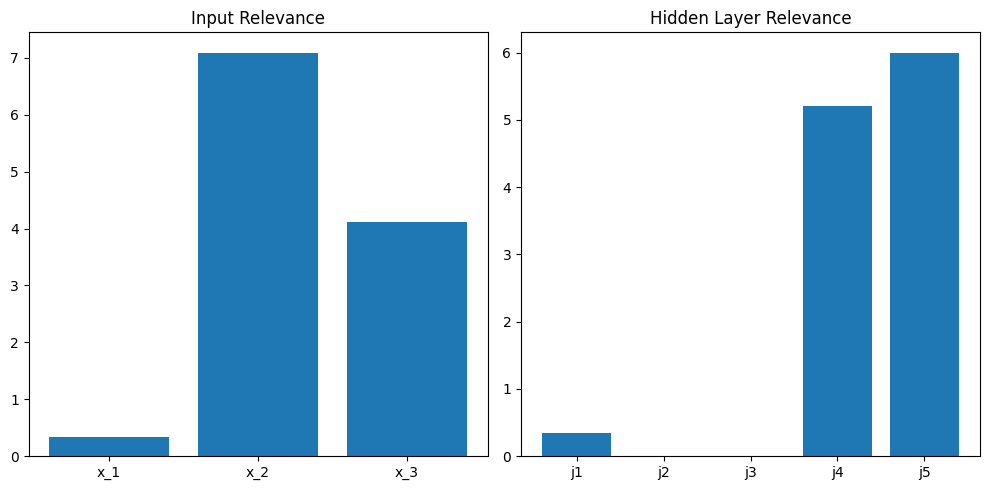

Output of the network: -0.8500000000000001
Relevance at output layer (R_k): -0.8500000000000001
Relevance at hidden layer (R_j): {'j1': 0.3500000000000001, 'j2': 0, 'j3': 0, 'j4': 5.2, 'j5': 6.0}
Relevance at input layer (R_i): {'x_1': 0.33866598557723643, 'x_2': 7.091869720796771, 'x_3': 4.119464293625993}


In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate neuron activations
def calculate_activations(x_i, weights_j, weights_k):
    activations_j = {}
    for j_index, w_j in weights_j.items():
        sum_j = sum(x_i[i_index] * w_j[i_index] for i_index in x_i)
        activations_j[j_index] = max(0, sum_j)  # ReLU activation

    sum_k = sum(activations_j[j_index] * weights_k[j_index] for j_index in activations_j)
    return activations_j, sum_k

# Function to calculate LRP relevances
def calculate_relevances(activations_j, weights_j, weights_k, x_i):
  R_k = activations_j['j5'] * weights_k['j5'] + activations_j['j1'] * weights_k['j1'] + activations_j['j2'] * weights_k['j2']+ activations_j['j3'] * weights_k['j3']+ activations_j['j4'] * weights_k['j4']
  R_j = {}
  for j in activations_j:
    R_j[j] = activations_j[j]

  R_i = {}
  for i in x_i:
    R_i[i] = 0
    for j in activations_j:
        sum_wj_sq = sum(weights_j[j][i_]**2 for i_ in x_i)
        R_i[i] += (weights_j[j][i]**2 / sum_wj_sq) * R_j[j]
  return R_k, R_j, R_i


# Example usage
x_i_dict = {'x_1': 2, 'x_2': 1, 'x_3': -7}
weights_j = {
    'j1': {'x_1': -0.5, 'x_2': 0.3, 'x_3': -0.15},
    'j2': {'x_1': -0.25, 'x_2': 0.1, 'x_3': 0.47},
    'j3': {'x_1': 0.2, 'x_2': 0.3, 'x_3': 0.4},
    'j4': {'x_1': 0.1, 'x_2': 0.8, 'x_3': -0.6},
    'j5': {'x_1': 0.1, 'x_2': 0.9, 'x_3': -0.7},
}
weights_k = {'j1': 0.2, 'j2': 0.9, 'j3': -0.7, 'j4': 0.4, 'j5': -0.5}

activations_j, output_k = calculate_activations(x_i_dict, weights_j, weights_k)
R_k, R_j, R_i = calculate_relevances(activations_j, weights_j, weights_k, x_i_dict)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(R_i.keys(), R_i.values())
plt.title('Input Relevance')

plt.subplot(1, 2, 2)
plt.bar(R_j.keys(), R_j.values())
plt.title('Hidden Layer Relevance')

plt.tight_layout()
plt.show()

print("Output of the network:", output_k)
print("Relevance at output layer (R_k):", R_k)
print("Relevance at hidden layer (R_j):", R_j)
print("Relevance at input layer (R_i):", R_i)


In [ ]:
# Install the innvestigate package if not already installed
!pip install innvestigate


In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# -------------------------------
# 1. Create and preprocess synthetic dataset
# -------------------------------
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the dataset for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# -------------------------------
# 2. Define a simple neural network
# -------------------------------
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Instantiate the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# -------------------------------
# 3. Train the neural network
# -------------------------------
epochs = 50
loss_history = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# -------------------------------
# 4. Evaluate the model
# -------------------------------
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_labels = (predictions > 0.5).float()
    accuracy = (predicted_labels.eq(y_test_tensor).sum().item()) / y_test_tensor.shape[0]
    print(f"Test Accuracy: {accuracy:.4f}")

# -------------------------------
# 5. Implement Layer-wise Relevance Propagation (LRP)
# -------------------------------
def lrp(model, x):
    """ Compute Layer-wise Relevance Propagation (LRP) """
    x.requires_grad = True
    output = model(x)
    output.backward(torch.ones_like(output))  # Compute gradients
    relevance = x.grad * x  # Relevance is the product of input and its gradient
    return relevance.detach().numpy()

# Compute relevance for test samples
relevance_scores = lrp(model, X_test_tensor)

# Sum the relevance scores for each sample
relevance_sum = relevance_scores.sum(axis=1)



Epoch 1/50, Loss: 0.6910
Epoch 11/50, Loss: 0.4855
Epoch 21/50, Loss: 0.3467
Epoch 31/50, Loss: 0.2790
Epoch 41/50, Loss: 0.2531
Test Accuracy: 0.9150


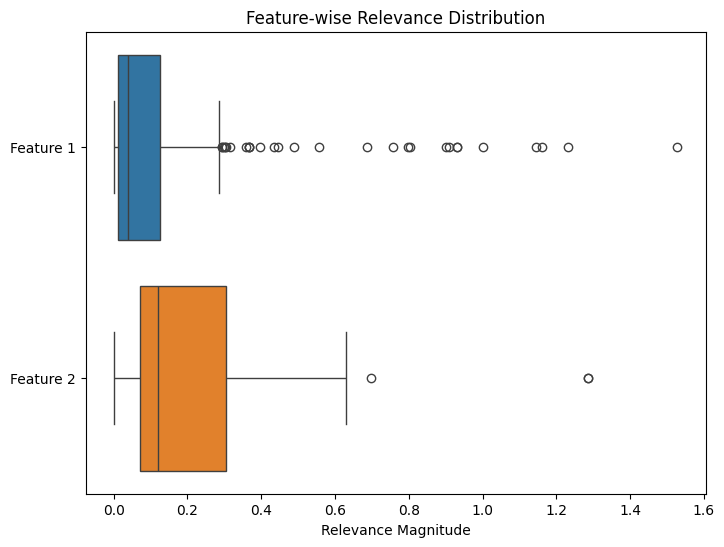

In [53]:
import seaborn as sns

# Compute LRP relevance for test samples
relevance_scores = lrp(model, X_test_tensor)

# Take absolute values for better visualization
relevance_abs = np.abs(relevance_scores)

# Create a boxplot for each feature to see the relevance distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=relevance_abs, orient="h")
plt.yticks([0, 1], ["Feature 1", "Feature 2"])
plt.xlabel("Relevance Magnitude")
plt.title("Feature-wise Relevance Distribution")
plt.show()


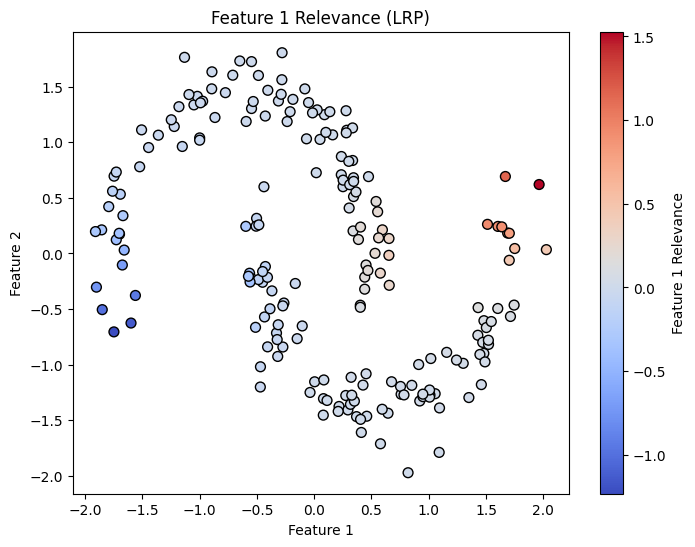

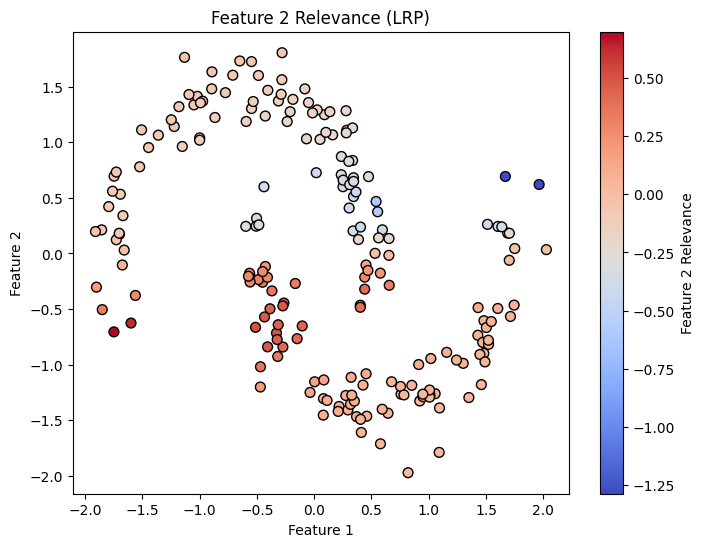

In [54]:
# Scatter plot where color represents feature 1 relevance
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=relevance_scores[:, 0], cmap="coolwarm", s=50, edgecolor="k")
plt.colorbar(label="Feature 1 Relevance")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Feature 1 Relevance (LRP)")
plt.show()

# Scatter plot where color represents feature 2 relevance
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=relevance_scores[:, 1], cmap="coolwarm", s=50, edgecolor="k")
plt.colorbar(label="Feature 2 Relevance")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Feature 2 Relevance (LRP)")
plt.show()
